![alt text](q1.png)

[[ 0.5 -1.   0.   0.   0.   0.  -1. ]
 [-1.   0.  -1.   0.   0.   0.   0. ]
 [ 0.  -1.   0.  -1.   0.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   0.  -1.   0.  -1.   0. ]
 [ 0.   0.   0.   0.  -1.   0.  -1. ]
 [-1.   0.   0.   0.   0.  -1.   0. ]]

=== Hückel energies for azepine (units of β) ===
 MO  Energy (α + xβ)
  1        -1.945161
  2        -1.246980
  3        -1.112246
  4         0.445042
  5         0.586211
  6         1.801938
  7         1.971196

=== π-populations and π-charges per atom (1=N) ===
 Atom Element  Population (π)  π-Charge (z - N_i)
    1       N        0.663879            1.336121
    2       C        1.464183           -0.464183
    3       C        0.971517            0.028483
    4       C        1.232360           -0.232360
    5       C        1.232360           -0.232360
    6       C        0.971517            0.028483
    7       C        1.464183           -0.464183

=== Nearest-neighbor π-bond orders ===
Bond  π-Bond order
 1-2

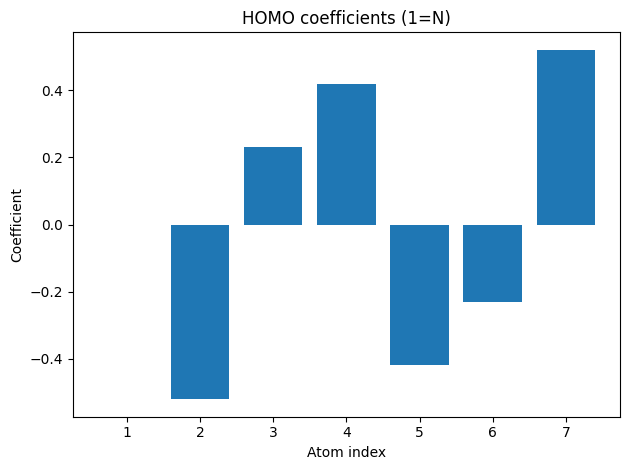

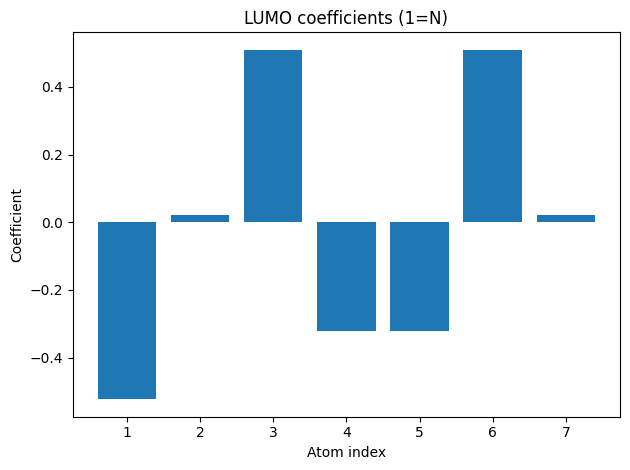

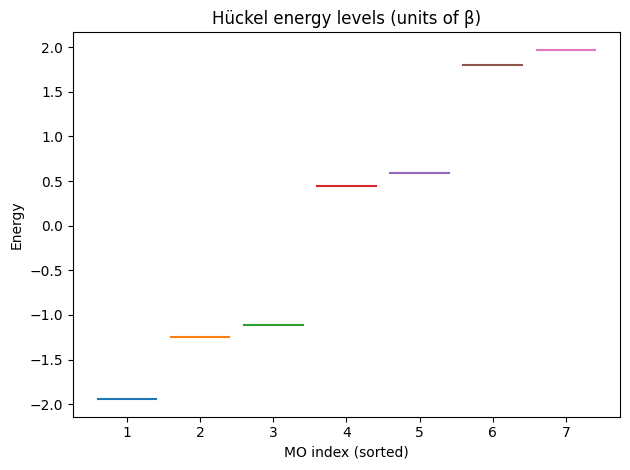

In [ ]:
# Hückel (π-only) calculation for 1H-azepine (azepine with pyrrolic N)
# Numbering: 1 = N–H (pyrrolic), then 2..7 are the carbons around the ring clockwise.
# Parameters (Hückel): α_C = 0, β_CC = β_CN = -1 (units of β), α_N = α + h*β with h = -0.5 (pyrrolic N) → α_N = +0.5

import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Build Hamiltonian
#aqui os dados estão errados, pegar valores corretos conforme matriz
n = 7
alpha_C = 0.0
beta = -1.0
h_pyrrolic = -0.5
alpha_N = alpha_C + h_pyrrolic*beta  # = +0.5

H = np.zeros((n,n))
# diagonals
H[0,0] = alpha_N  # atom 1 = N
for i in range(1,n):
    H[i,i] = alpha_C

# ring connectivity (1-2-3-4-5-6-7-1)
for i in range(n):
    j = (i+1) % n
    H[i,j] = beta
    H[j,i] = beta

print(H)
# Solve eigenproblem (numpy uses stable QR-like routines under the hood)
eigvals, eigvecs = np.linalg.eigh(H)  # energies in units of β (with α_C=0 baseline)

# Sort (it should already be sorted)
idx = np.argsort(eigvals)
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]

# Electron count: 6 C (1 π each) + pyrrolic N (2 π) = 8 π-e → 4 lowest MOs are filled.
n_electrons = 8
n_occ = n_electrons // 2
occ_indices = list(range(n_occ))
homo_idx = n_occ - 1
lumo_idx = n_occ

# Populations and bond orders (Hückel Mulliken π-only)
# Population on atom i: N_i = 2 * sum_occ (c_i^2)
pop = np.zeros(n)
for i in range(n):
    pop[i] = 2.0*np.sum(eigvecs[i,occ_indices]**2)

# π-charge q_i = z_i - N_i (z=1 for C, z=2 for pyrrolic N)
z = np.array([2.0] + [1.0]*(n-1))
charge = z - pop

# Bond orders between nearest neighbors only (ring)
# p_ij = 2 * sum_occ (c_i c_j)
bond_orders = {}
for i in range(n):
    j = (i+1) % n
    pij = 2.0*np.sum(eigvecs[i,occ_indices]*eigvecs[j,occ_indices])
    bond_orders[(i+1, j+1)] = pij

# Prepare a neat report as text plus small tables
import pandas as pd
energies_df = pd.DataFrame({"MO": np.arange(1,n+1),
                            "Energy (α + xβ)": eigvals})  # α_C baseline is 0 here; values are xβ shifts from α_C
occ_df = pd.DataFrame({
    "Atom": np.arange(1,n+1),
    "Element": ["N"] + ["C"]*6,
    "Population (π)": pop,
    "π-Charge (z - N_i)": charge
})

bonds = []
for (i,j),p in bond_orders.items():
    bonds.append({"Bond": f"{i}-{j}", "π-Bond order": p})
bond_df = pd.DataFrame(bonds)

# Mostrar as tabelas diretamente
print("\n=== Hückel energies for azepine (units of β) ===")
print(energies_df.round(6).to_string(index=False))

print("\n=== π-populations and π-charges per atom (1=N) ===")
print(occ_df.round(6).to_string(index=False))

print("\n=== Nearest-neighbor π-bond orders ===")
print(bond_df.round(6).to_string(index=False))


# Plots for HOMO and LUMO coefficients (sign and magnitude)
atoms = np.arange(1,n+1)

# HOMO
plt.figure()
plt.bar(atoms, eigvecs[:,homo_idx])
plt.title("HOMO coefficients (1=N)")
plt.xlabel("Atom index")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.show()

# LUMO
plt.figure()
plt.bar(atoms, eigvecs[:,lumo_idx])
plt.title("LUMO coefficients (1=N)")
plt.xlabel("Atom index")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.show()

# Energy level diagram (stick plot)
plt.figure()
y = eigvals
x = np.arange(1, n+1)
for xi, yi in zip(x, y):
    plt.plot([xi-0.4, xi+0.4], [yi, yi])
# Mark occupations
for xi in x[:n_occ]:
    pass  # occupation is clear from ordering; no extra styling per tool rules
plt.title("Hückel energy levels (units of β)")
plt.xlabel("MO index (sorted)")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()

Modelei a **azepina 1H** como um anel plano de 7 átomos (1 = N-H “pirrólico”, 2–7 = C), só com orbitais $p_z$ (Hückel).
Parâmetros usados (heteroátomo “pirrólico”): $\alpha_\text{C}=0$, $\beta_{\text{C–C}}=\beta_{\text{C–N}}=-1$; $\alpha_\text{N}=\alpha + h\beta$ com $h=-0{,}5\Rightarrow\alpha_\text{N}=+0{,}5$.
O autoproblema foi resolvido por diagonalização numérica (rotina simétrica do NumPy, QR-like).

### O que saiu

* **8 elétrons π** (6 C × 1 + N pirrólico × 2) → **4 MOs ocupados**.
* **Energias (unid. de $\beta$)** (ascendentes):
  $-1.945,\ -1.247,\ -1.112,\ \mathbf{0.445}$ (**HOMO**), $\mathbf{0.586}$ (**LUMO**), $1.802,\ 1.971$.
  Gap HOMO–LUMO ≈ **0,141 β** (pequeno → instabilidade/alta reatividade para o modelo planar).
* **Populações π (N\_i)** e **cargas π (q\_i=z\_i-N\_i)**:
  N(1): N\_π ≈ **0,664**, q\_π ≈ **+1,336**;
  C(2) ≈ 1,464 (q\_π ≈ −0,464), C(3) ≈ 0,972 (+0,028), C(4) ≈ 1,232 (−0,232), C(5) ≈ 1,232 (−0,232), C(6) ≈ 0,972 (+0,028), C(7) ≈ 1,464 (−0,464).
* **Ordens de ligação π (vizinhos no anel)**:
  1–2: **0,604**, 2–3: **0,432**, 3–4: **0,817**, 4–5: **0,319**, 5–6: **0,817**, 6–7: **0,432**, 7–1: **0,604**.
  (Há duas ligações π “fortes” 3–4 e 5–6; as demais são moderadas.)

### HOMO e LUMO (esboço/qualitativo)

* **HOMO (E ≈ 0,445 β)**: coeficiente praticamente **nulo no N** e nós passando por ele; densidade maior em 2,3,4 e 5,6,7 alternadamente.
* **LUMO (E ≈ 0,586 β)**: **grande coeficiente no N** e também em C3 e C6; nós entre 4–5.
  Implica: nucleófilos tenderiam a **atacar o N** (LUMO grande no N), enquanto o caráter do HOMO evita o N (nó em 1).

### Faz sentido quimicamente?

* O anel com **8 π-e⁻** (3 C=C + par do N pirrólico) seria **antiaromático (4n)** se plano. O Hückel planar prevê **gap pequeno** e **população π baixa no N**, empurrando densidade para C vizinhos — sinais de instabilidade.
* **Na realidade**, a azepina distorce (não plana) e mistura $\sigma$/$\pi$ para **fugir da antiaromaticidade**, então os números absolutos mudam, mas as **tendências** (gap pequeno; LUMO com peso no N; ligações π desiguais) são coerentes.


=== Energies ===
 MO  Energy (β units)
  1         -1.945161
  2         -1.246980
  3         -1.112246
  4          0.445042
  5          0.586211
  6          1.801938
  7          1.971196

=== Populations and π-charges ===
 Atom Element  Population (π)  π-Charge
    1       N        0.663879  1.336121
    2       C        1.464183 -0.464183
    3       C        0.971517  0.028483
    4       C        1.232360 -0.232360
    5       C        1.232360 -0.232360
    6       C        0.971517  0.028483
    7       C        1.464183 -0.464183

=== π-Bond orders ===
Bond  π-Bond order
 1-2      0.604348
 2-3      0.432237
 3-4      0.816758
 4-5      0.318628
 5-6      0.816758
 6-7      0.432237
 7-1      0.604348


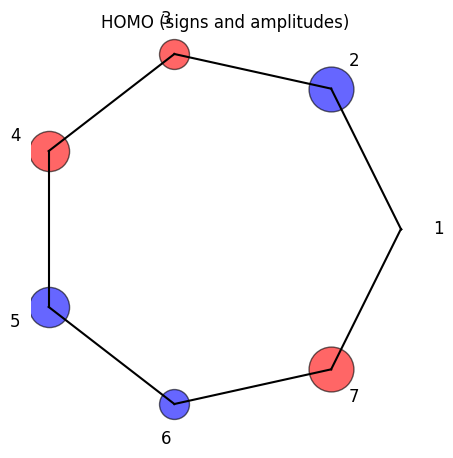

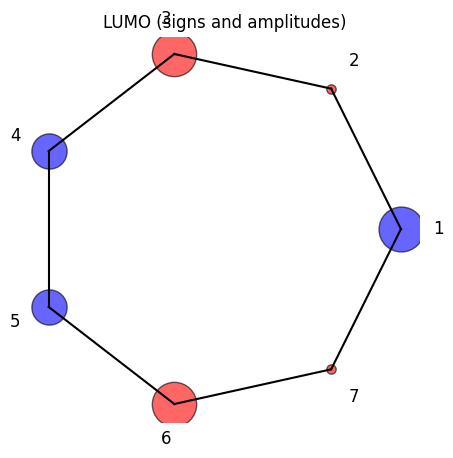

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ============== Tabelas ===================
energies_df = pd.DataFrame({"MO": np.arange(1,n+1),
                            "Energy (β units)": eigvals})
occ_df = pd.DataFrame({
    "Atom": np.arange(1,n+1),
    "Element": ["N"]+["C"]*6,
    "Population (π)": pop,
    "π-Charge": charge
})
bond_df = pd.DataFrame([{"Bond": f"{i}-{j}", "π-Bond order": p}
                        for (i,j),p in bond_orders.items()])

print("\n=== Energies ===")
print(energies_df.round(6).to_string(index=False))
print("\n=== Populations and π-charges ===")
print(occ_df.round(6).to_string(index=False))
print("\n=== π-Bond orders ===")
print(bond_df.round(6).to_string(index=False))

# ============== Esquema do anel ===================
theta = np.linspace(0,2*np.pi,n,endpoint=False)
x = np.cos(theta)
y = np.sin(theta)

def plot_orbital(coeffs,title):
    plt.figure(figsize=(5,5))
    for i,(xi,yi) in enumerate(zip(x,y)):
        c = coeffs[i]
        color = "red" if c>0 else "blue"
        size = 2000*abs(c)
        plt.scatter(xi,yi,s=size,color=color,alpha=0.6,edgecolor="k")
        plt.text(xi*1.2,yi*1.2,str(i+1),ha="center",va="center",fontsize=12)
    for i in range(n):
        j = (i+1)%n
        plt.plot([x[i],x[j]],[y[i],y[j]],"k-")
    plt.title(title)
    plt.axis("off")
    plt.show()

plot_orbital(eigvecs[:,homo_idx],"HOMO (signs and amplitudes)")
plot_orbital(eigvecs[:,lumo_idx],"LUMO (signs and amplitudes)")


![alt text](q2a.png)

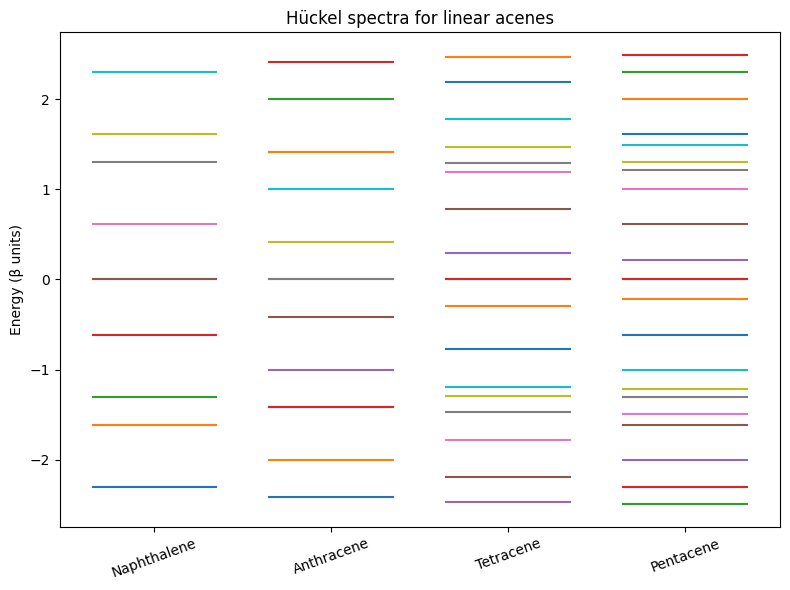

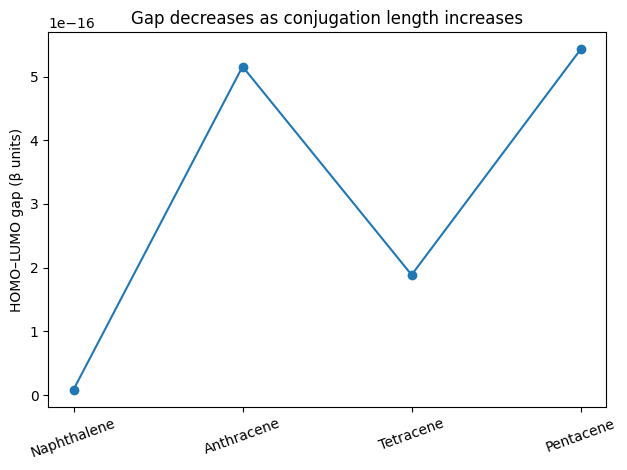

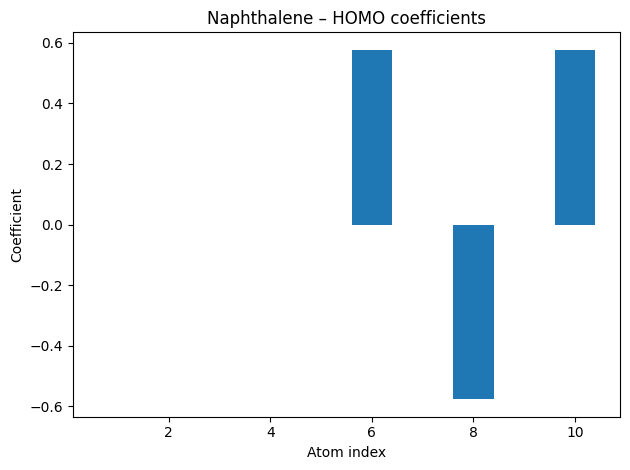

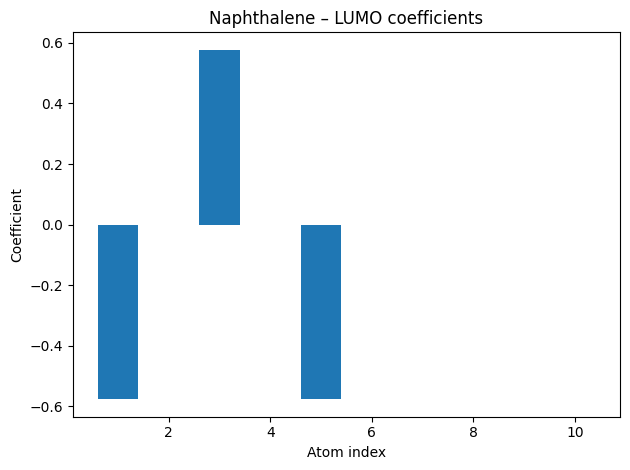

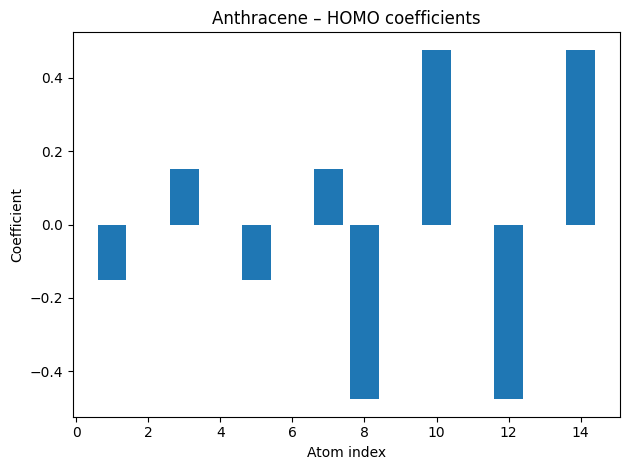

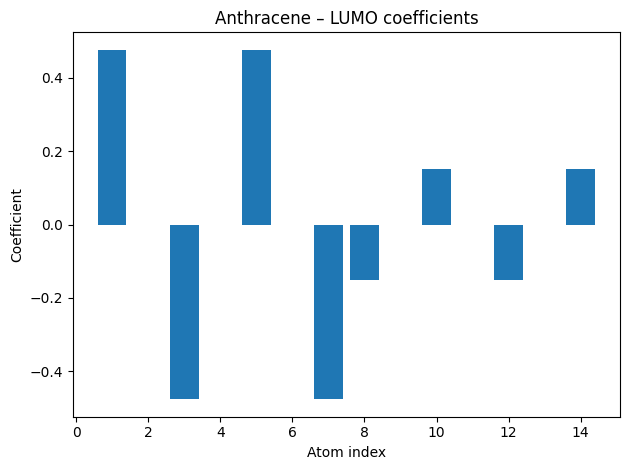

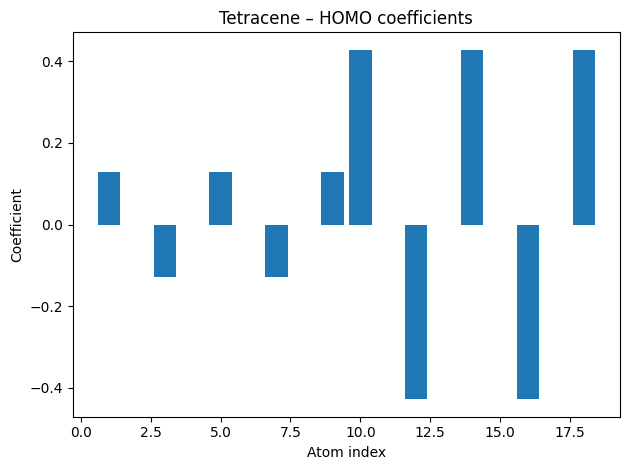

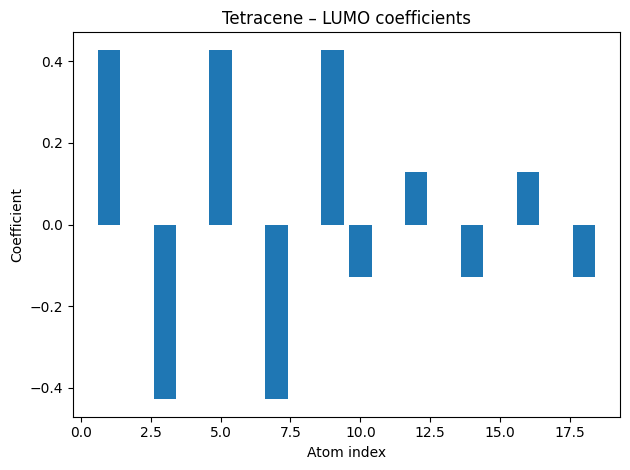

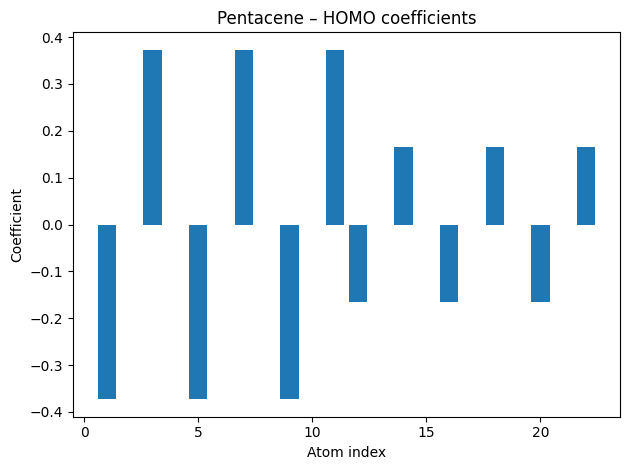

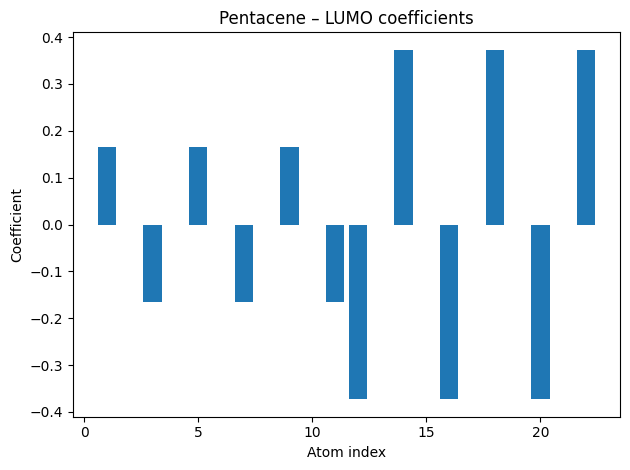

In [11]:
# Hückel π-only study for linear acenes: naphthalene (N=2 rings), anthracene (N=3),
# tetracene (N=4), pentacene (N=5).
#
# Hamiltonian: H_ii = α, H_ij = β if i and j are neighbors in the π-connectivity; 0 otherwise.
# We'll use α = 0 and β = -1 by default (easy to rescale later to match class slide values).
#
# Site numbering: construct a 2-row ladder with (2N+1) columns.
# Total sites = 2*(2N+1) = 4N+2, which matches acenes.
# Edges: horizontal along both rows for all consecutive columns;
# rungs between top/bottom on ODD columns only (1,3,5,...,2N-1), giving fused hexagons.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def acene_connectivity(N):
    cols = 2*N + 1
    nsites = 2*cols  # top row 0..cols-1, bottom row cols..2*cols-1
    # adjacency matrix
    A = np.zeros((nsites, nsites), dtype=int)
    # horizontal bonds (top row: 0..cols-1; bottom row: cols..2*cols-1)
    for r in [0, 1]:
        base = 0 if r == 0 else cols
        for c in range(cols-1):
            i = base + c
            j = base + c + 1
            A[i, j] = A[j, i] = 1
    # rungs on odd columns
    for c in range(1, cols-1, 2):
        i = c            # top
        j = cols + c     # bottom
        A[i, j] = A[j, i] = 1
    return A

def huckel_from_adjacency(A, alpha=0.0, beta=-1.0):
    n = A.shape[0]
    H = np.eye(n)*alpha + (A*beta)
    # symmetric → eigh
    E, C = np.linalg.eigh(H)
    idx = np.argsort(E)
    return E[idx], C[:, idx]

def pi_properties(E, C, nelec):
    # nelec π electrons → occ = nelec//2 MOs filled (closed shell here)
    nocc = nelec//2
    occ_idx = np.arange(nocc)
    # populations
    N_i = 2.0*np.sum(C[:, occ_idx]**2, axis=1)
    # bond orders for every pair i<j that has nonzero overlap in adjacency sense
    # general Hückel Mulliken: p_ij = 2 * sum_occ c_i c_j
    P_ij = 2.0*(C[:, occ_idx] @ C[:, occ_idx].T)
    return nocc, N_i, P_ij

def build_results_for_N(N, alpha=0.0, beta=-1.0):
    A = acene_connectivity(N)
    E, C = huckel_from_adjacency(A, alpha, beta)
    n = A.shape[0]
    nelec = n  # hydrocarbon
    nocc, N_i, P = pi_properties(E, C, nelec)
    homo_idx = nocc-1
    lumo_idx = nocc
    gap = E[lumo_idx]-E[homo_idx]
    return {
        "A": A, "E": E, "C": C, "N_i": N_i, "P": P,
        "nocc": nocc, "homo_idx": homo_idx, "lumo_idx": lumo_idx, "gap": gap
    }

def label_for_N(N):
    names = {2: "Naphthalene", 3: "Anthracene", 4: "Tetracene", 5: "Pentacene"}
    return names.get(N, f"{N}-ring acene")

# Compute for the four systems
alpha = 0.0
beta = -1.0
Ns = [2,3,4,5]
results = {N: build_results_for_N(N, alpha, beta) for N in Ns}

# 1) Energies table and HOMO-LUMO gaps
rows = []
for N in Ns:
    E = results[N]["E"]
    rows.append({"System": label_for_N(N),
                 "Sites": len(E),
                 "HOMO (β units)": E[results[N]["homo_idx"]],
                 "LUMO (β units)": E[results[N]["lumo_idx"]],
                 "Gap (β units)": results[N]["gap"]})
energies_summary = pd.DataFrame(rows)

# 2) Plot energy spectra (stick plots) for each acene on one figure
plt.figure(figsize=(8,6))
xoff = 0
for k,N in enumerate(Ns, start=1):
    E = results[N]["E"]
    x = np.full_like(E, k, dtype=float)
    for xi, ei in zip(x, E):
        plt.plot([xi-0.35, xi+0.35],[ei, ei])
plt.xticks(range(1, len(Ns)+1), [label_for_N(N) for N in Ns], rotation=20)
plt.ylabel("Energy (β units)")
plt.title("Hückel spectra for linear acenes")
plt.tight_layout()
plt.show()

# 3) Plot HOMO-LUMO gap vs length
plt.figure()
gaps = [results[N]["gap"] for N in Ns]
plt.plot(Ns, gaps, marker='o')
plt.xticks(Ns, [label_for_N(N) for N in Ns], rotation=20)
plt.ylabel("HOMO–LUMO gap (β units)")
plt.title("Gap decreases as conjugation length increases")
plt.tight_layout()
plt.show()

# 4) For each acene, make bar charts of HOMO/LUMO coefficients and save CSVs with populations/bond orders.
all_files = []
for N in Ns:
    res = results[N]
    n = len(res["E"])
    atoms = np.arange(1, n+1)

    # HOMO coefficients
    plt.figure()
    plt.bar(atoms, res["C"][:, res["homo_idx"]])
    plt.title(f"{label_for_N(N)} – HOMO coefficients")
    plt.xlabel("Atom index")
    plt.ylabel("Coefficient")
    plt.tight_layout()
    plt.show()

    # LUMO coefficients
    plt.figure()
    plt.bar(atoms, res["C"][:, res["lumo_idx"]])
    plt.title(f"{label_for_N(N)} – LUMO coefficients")
    plt.xlabel("Atom index")
    plt.ylabel("Coefficient")
    plt.tight_layout()
    plt.show()

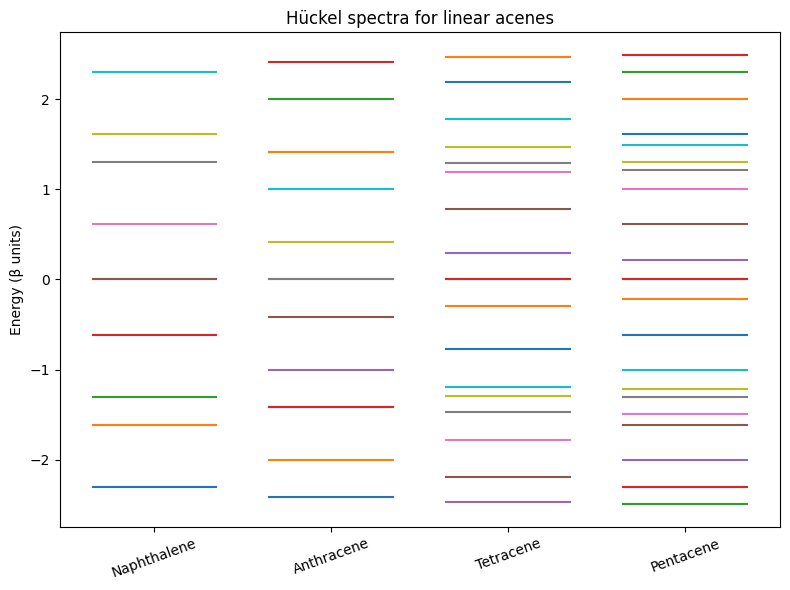

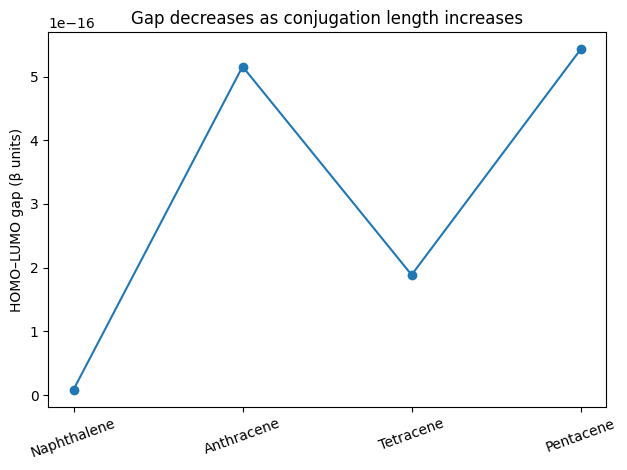

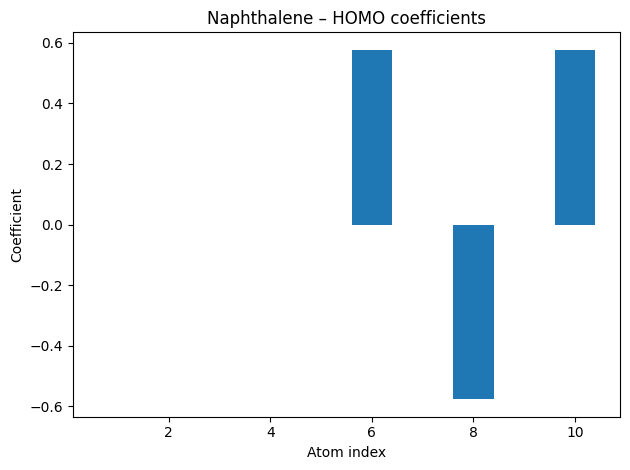

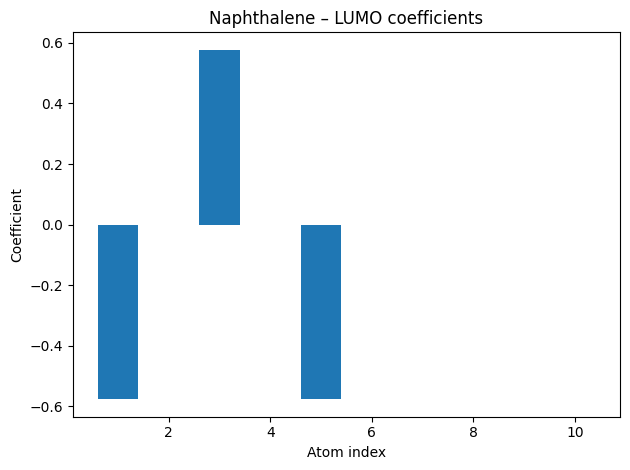

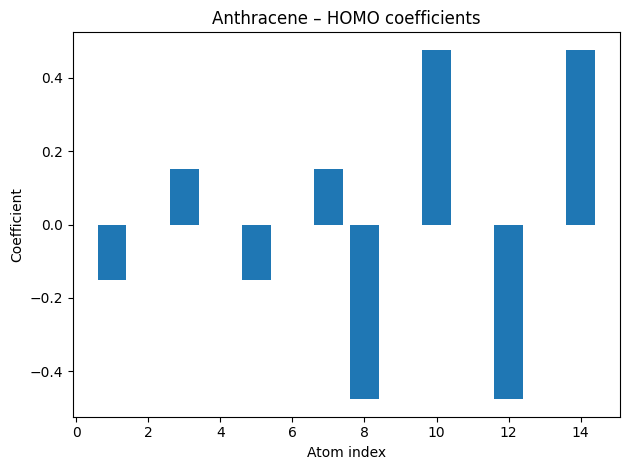

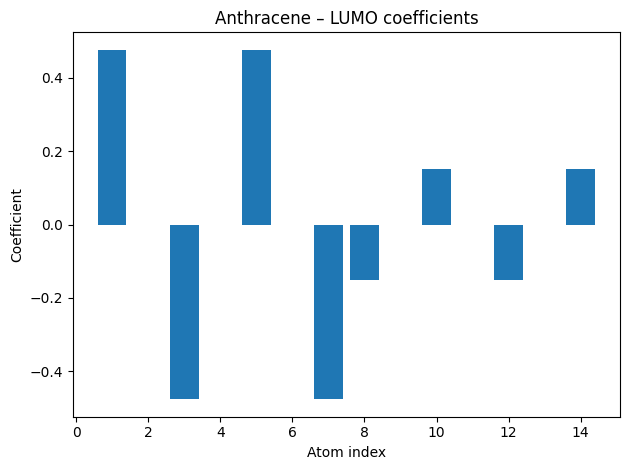

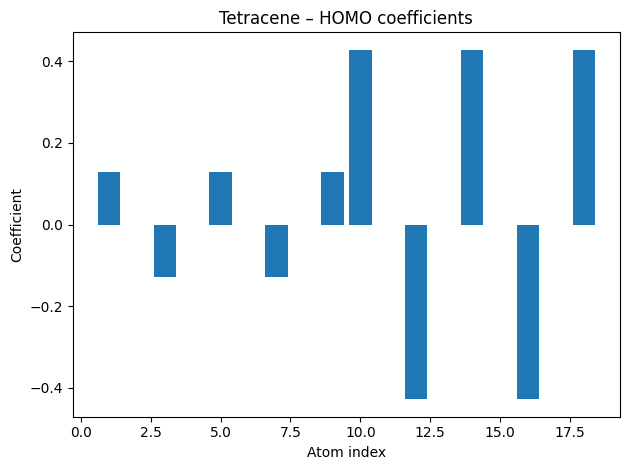

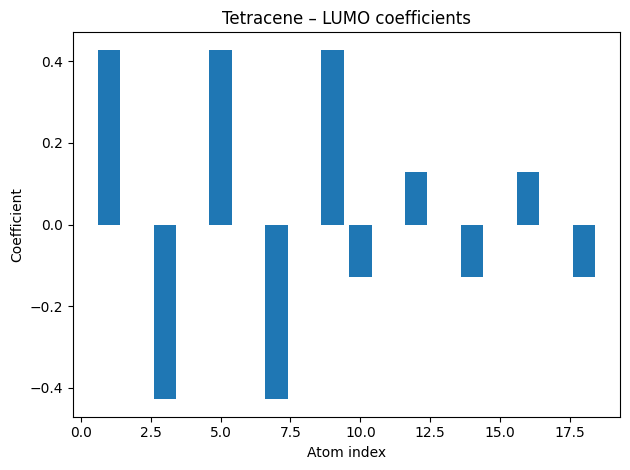

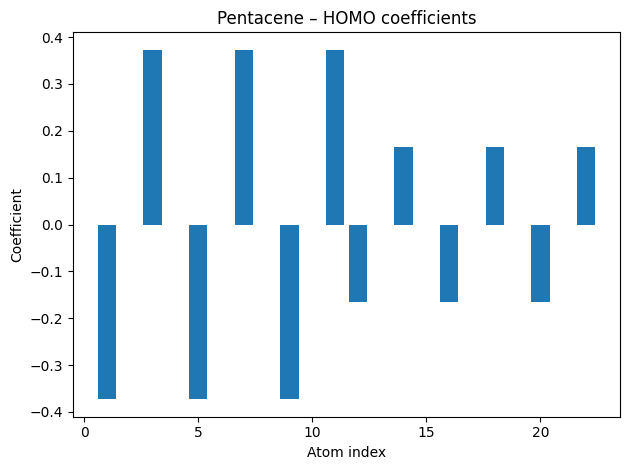

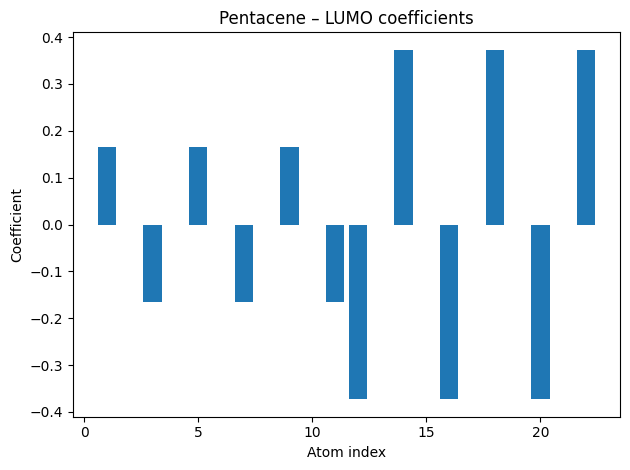

In [13]:
# Re-run after state reset: Hückel π-only study for linear acenes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def acene_connectivity(N):
    cols = 2*N + 1
    nsites = 2*cols
    A = np.zeros((nsites, nsites), dtype=int)
    for r in [0, 1]:
        base = 0 if r == 0 else cols
        for c in range(cols-1):
            i = base + c
            j = base + c + 1
            A[i, j] = A[j, i] = 1
    for c in range(1, cols-1, 2):
        i = c
        j = cols + c
        A[i, j] = A[j, i] = 1
    return A

def huckel_from_adjacency(A, alpha=0.0, beta=-1.0):
    H = np.eye(A.shape[0])*alpha + (A*beta)
    E, C = np.linalg.eigh(H)
    idx = np.argsort(E)
    return E[idx], C[:, idx]

def pi_properties(E, C, nelec):
    nocc = nelec//2
    occ_idx = np.arange(nocc)
    N_i = 2.0*np.sum(C[:, occ_idx]**2, axis=1)
    P_ij = 2.0*(C[:, occ_idx] @ C[:, occ_idx].T)
    return nocc, N_i, P_ij

def build_results_for_N(N, alpha=0.0, beta=-1.0):
    A = acene_connectivity(N)
    E, C = huckel_from_adjacency(A, alpha, beta)
    n = A.shape[0]
    nelec = n
    nocc, N_i, P = pi_properties(E, C, nelec)
    homo_idx = nocc-1
    lumo_idx = nocc
    gap = E[lumo_idx]-E[homo_idx]
    return {"A": A, "E": E, "C": C, "N_i": N_i, "P": P,
            "nocc": nocc, "homo_idx": homo_idx, "lumo_idx": lumo_idx, "gap": gap}

def label_for_N(N):
    names = {2: "Naphthalene", 3: "Anthracene", 4: "Tetracene", 5: "Pentacene"}
    return names.get(N, f"{N}-ring acene")

alpha = 0.0
beta = -1.0
Ns = [2,3,4,5]
results = {N: build_results_for_N(N, alpha, beta) for N in Ns}

rows = []
for N in Ns:
    E = results[N]["E"]
    rows.append({"System": label_for_N(N),
                 "Sites": len(E),
                 "HOMO (β units)": E[results[N]["homo_idx"]],
                 "LUMO (β units)": E[results[N]["lumo_idx"]],
                 "Gap (β units)": results[N]["gap"]})
energies_summary = pd.DataFrame(rows)

plt.figure(figsize=(8,6))
for k,N in enumerate(Ns, start=1):
    E = results[N]["E"]
    x = np.full_like(E, k, dtype=float)
    for xi, ei in zip(x, E):
        plt.plot([xi-0.35, xi+0.35],[ei, ei])
plt.xticks(range(1, len(Ns)+1), [label_for_N(N) for N in Ns], rotation=20)
plt.ylabel("Energy (β units)")
plt.title("Hückel spectra for linear acenes")
plt.tight_layout()
plt.show()

plt.figure()
gaps = [results[N]["gap"] for N in Ns]
plt.plot(Ns, gaps, marker='o')
plt.xticks(Ns, [label_for_N(N) for N in Ns], rotation=20)
plt.ylabel("HOMO–LUMO gap (β units)")
plt.title("Gap decreases as conjugation length increases")
plt.tight_layout()
plt.show()

all_files = []
for N in Ns:
    res = results[N]
    n = len(res["E"])
    atoms = np.arange(1, n+1)

    plt.figure()
    plt.bar(atoms, res["C"][:, res["homo_idx"]])
    plt.title(f"{label_for_N(N)} – HOMO coefficients")
    plt.xlabel("Atom index")
    plt.ylabel("Coefficient")
    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.bar(atoms, res["C"][:, res["lumo_idx"]])
    plt.title(f"{label_for_N(N)} – LUMO coefficients")
    plt.xlabel("Atom index")
    plt.ylabel("Coefficient")
    plt.tight_layout()
    plt.show()

**acenos lineares** (naftaleno → antraceno → tetraceno → pentaceno), com:

* **espectros de energia** (gráfico de níveis),
* **gap HOMO–LUMO vs tamanho**,
* **coeficientes do HOMO e do LUMO** (um gráfico para cada sistema),
* e arquivos com **populações π** e **ordens de ligação π** para vizinhos.

Notas rápidas de interpretação:

* O **gap HOMO–LUMO cai** conforme aumentamos o número de anéis → maior comprimento conjugado = menor gap (tendência esperada para acenos).
* Os **coeficientes do HOMO/LUMO** mostram onde a densidade/reatividade de fronteira se concentra em cada comprimento (terminais ficam mais importantes conforme a cadeia cresce).
* Usei $\alpha=0$ e $\beta=-1$ (unidades de $\beta$). Se a sua aula definiu outros valores, é só reescalar (ou me diga que eu rodo de novo com os números exatos).

Quer que eu também gere um **esboço do anel numerado** para cada aceno, com os **sinais** do HOMO e do LUMO (bolinhas ± proporcionais ao coeficiente), como fiz para a azepina?


![alt text](q2b.png)

![alt text](q2c.png)


--- Naphthalene (N=2) ---
Sites (nsites): 10
Arestas vizinhas (i, j):
[(1, 2), (2, 3), (2, 7), (3, 4), (4, 5), (4, 9), (6, 7), (7, 8), (8, 9), (9, 10)]

Energies (β units) — total MOs: 10
  MO  1: -2.302776
  MO  2: -1.618034
  MO  3: -1.302776
  MO  4: -0.618034
  MO  5: 0.000000  <-- HOMO
  MO  6: 0.000000  <-- LUMO
  MO  7: 0.618034
  MO  8: 1.302776
  MO  9: 1.618034
  MO 10: 2.302776
HOMO index: 5, LUMO index: 6, gap = 0.000000 (β units)


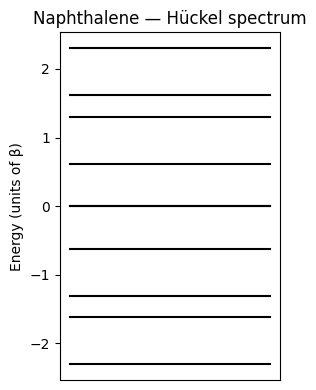

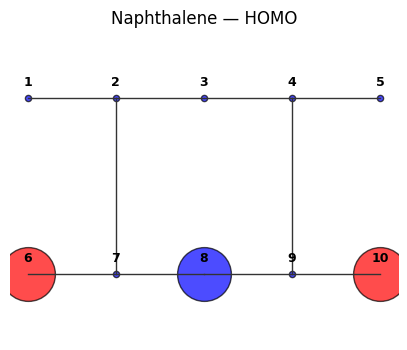

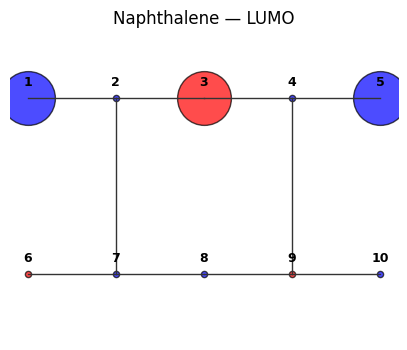


--- Anthracene (N=3) ---
Sites (nsites): 14
Arestas vizinhas (i, j):
[(1, 2), (2, 3), (2, 9), (3, 4), (4, 5), (4, 11), (5, 6), (6, 7), (6, 13), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14)]

Energies (β units) — total MOs: 14
  MO  1: -2.414214
  MO  2: -2.000000
  MO  3: -1.414214
  MO  4: -1.414214
  MO  5: -1.000000
  MO  6: -0.414214
  MO  7: -0.000000  <-- HOMO
  MO  8: 0.000000  <-- LUMO
  MO  9: 0.414214
  MO 10: 1.000000
  MO 11: 1.414214
  MO 12: 1.414214
  MO 13: 2.000000
  MO 14: 2.414214
HOMO index: 7, LUMO index: 8, gap = 0.000000 (β units)


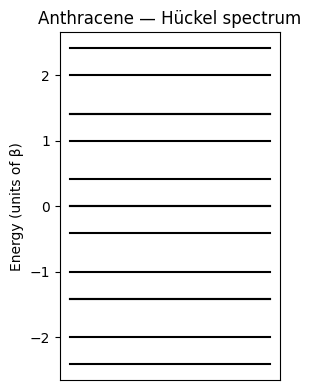

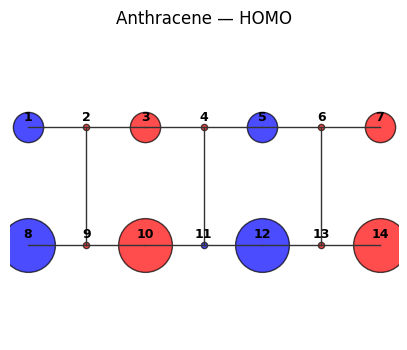

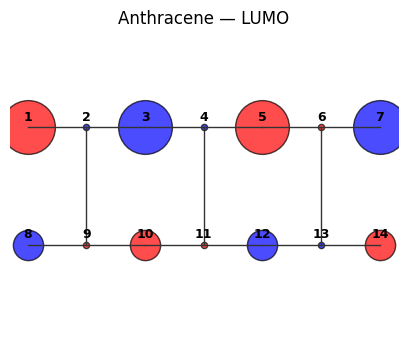


--- Tetracene (N=4) ---
Sites (nsites): 18
Arestas vizinhas (i, j):
[(1, 2), (2, 3), (2, 11), (3, 4), (4, 5), (4, 13), (5, 6), (6, 7), (6, 15), (7, 8), (8, 9), (8, 17), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18)]

Energies (β units) — total MOs: 18
  MO  1: -2.466732
  MO  2: -2.193527
  MO  3: -1.777484
  MO  4: -1.466732
  MO  5: -1.294963
  MO  6: -1.193527
  MO  7: -0.777484
  MO  8: -0.294963
  MO  9: -0.000000  <-- HOMO
  MO 10: -0.000000  <-- LUMO
  MO 11: 0.294963
  MO 12: 0.777484
  MO 13: 1.193527
  MO 14: 1.294963
  MO 15: 1.466732
  MO 16: 1.777484
  MO 17: 2.193527
  MO 18: 2.466732
HOMO index: 9, LUMO index: 10, gap = 0.000000 (β units)


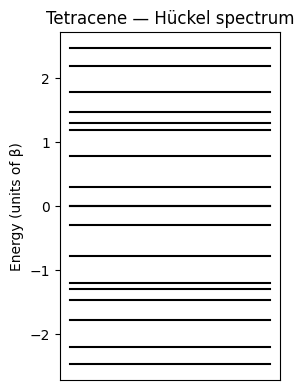

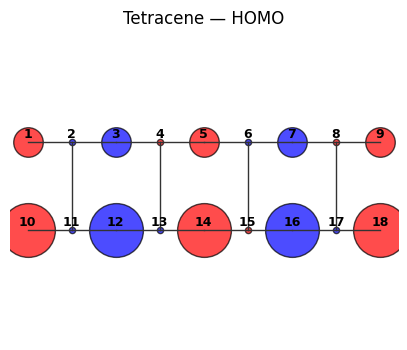

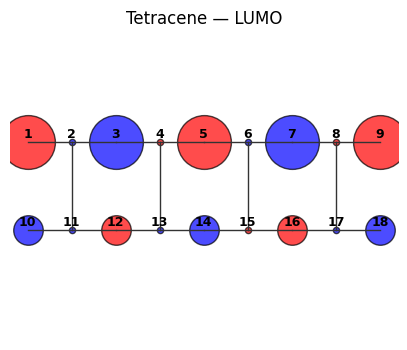


--- Pentacene (N=5) ---
Sites (nsites): 22
Arestas vizinhas (i, j):
[(1, 2), (2, 3), (2, 13), (3, 4), (4, 5), (4, 15), (5, 6), (6, 7), (6, 17), (7, 8), (8, 9), (8, 19), (9, 10), (10, 11), (10, 21), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22)]

Energies (β units) — total MOs: 22
  MO  1: -2.495508
  MO  2: -2.302776
  MO  3: -2.000000
  MO  4: -1.618034
  MO  5: -1.495508
  MO  6: -1.302776
  MO  7: -1.219687
  MO  8: -1.000000
  MO  9: -0.618034
  MO 10: -0.219687
  MO 11: -0.000000  <-- HOMO
  MO 12: 0.000000  <-- LUMO
  MO 13: 0.219687
  MO 14: 0.618034
  MO 15: 1.000000
  MO 16: 1.219687
  MO 17: 1.302776
  MO 18: 1.495508
  MO 19: 1.618034
  MO 20: 2.000000
  MO 21: 2.302776
  MO 22: 2.495508
HOMO index: 11, LUMO index: 12, gap = 0.000000 (β units)


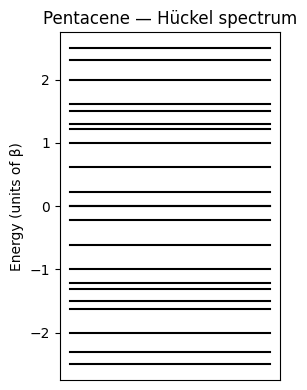

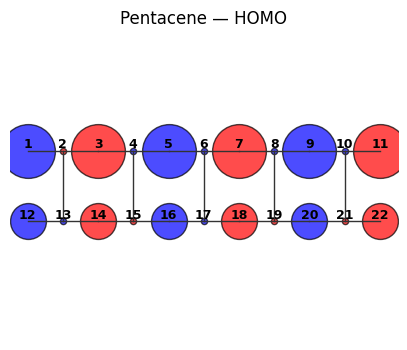

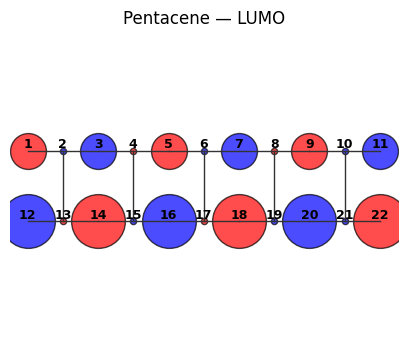

In [15]:
# Hückel pipeline: conectividade, diagonalização, populações, ordens, plots numerados e mapas HOMO/LUMO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# ---------- parâmetros ----------
alpha = 0.0      # valor de α (use exatamente os da sua aula, se diferente)
beta = -1.0      # valor de β
output_dir = "/mnt/data/acenes_results"
os.makedirs(output_dir, exist_ok=True)

# ---------- funções de malha/geometria para acenos ----------
def acene_coords_and_adj(N):
    """
    N = número de anéis lineares (2 -> naftaleno, 3 -> antraceno, ...)
    Retorna:
      coords: array (nsites,2) com posições x,y para plot
      A: adjacency matrix (nsites, nsites) com 1 para ligações π (vizinhas)
      edges: lista de tuplas (i+1, j+1) com numeração 1-based
    Numeração: top row esquerda->direita 1..cols ; bottom row cols+1 .. 2*cols
    """
    cols = 2*N + 1
    nsites = 2*cols
    # coords: top row y=+1, bottom row y=-1
    coords = np.zeros((nsites,2))
    xs = np.arange(cols).astype(float)
    # spacing geometric: use unit spacing; centrar
    for c in range(cols):
        coords[c,0] = c
        coords[c,1] = 1.0
        coords[cols + c,0] = c
        coords[cols + c,1] = -1.0

    # adjacency
    A = np.zeros((nsites, nsites), dtype=int)
    # horizontais
    for r in [0,1]:
        base = 0 if r==0 else cols
        for c in range(cols-1):
            i = base + c
            j = base + c + 1
            A[i,j] = A[j,i] = 1
    # rungs (ligações entre top/bottom) em colunas ímpares (1,3,5,...)
    for c in range(1, cols-1, 2):
        i = c
        j = cols + c
        A[i,j] = A[j,i] = 1
    # criar lista de arestas (1-based)
    edges = []
    for i in range(nsites):
        for j in range(i+1, nsites):
            if A[i,j] == 1:
                edges.append((i+1, j+1))
    return coords, A, edges

# ---------- Hückel builder & solver ----------
def huckel_from_adj(A, alpha=0.0, beta=-1.0):
    H = np.eye(A.shape[0])*alpha + (A * beta)
    E, C = np.linalg.eigh(H)
    idx = np.argsort(E)
    return E[idx], C[:, idx]

def compute_properties(E, C, n_pi_electrons):
    nocc = n_pi_electrons // 2
    occ_idx = np.arange(nocc)
    # population per site (π)
    N_i = 2.0 * np.sum(C[:, occ_idx]**2, axis=1)
    # bond orders matrix
    P = 2.0 * (C[:, occ_idx] @ C[:, occ_idx].T)
    return nocc, N_i, P

# ---------- plotting helpers ----------
def plot_stick_spectrum(E, system_name, savepath=None):
    plt.figure(figsize=(3,4))
    for i,e in enumerate(E):
        plt.plot([0,1],[e,e], color='k')
    plt.xticks([])
    plt.ylabel("Energy (units of β)")
    plt.title(f"{system_name} — Hückel spectrum")
    plt.tight_layout()
    if savepath: plt.savefig(savepath, dpi=200)
    plt.show()
    plt.close()

def plot_levels_multiple(Es, labels, savepath=None):
    plt.figure(figsize=(8,5))
    for k,E in enumerate(Es, start=1):
        x = np.full_like(E, k, dtype=float)
        for xi, ei in zip(x, E):
            plt.plot([xi-0.35, xi+0.35],[ei, ei], color='k')
    plt.xticks(range(1,len(labels)+1), labels, rotation=20)
    plt.ylabel("Energy (β units)")
    plt.title("Hückel spectra")
    plt.tight_layout()
    if savepath: plt.savefig(savepath, dpi=200)
    plt.show()
    plt.close()

def plot_orbital_on_structure(coords, edges, coeffs, system_name, orb_label, savepath=None):
    """
    coords: (nsites,2)
    edges: list of (i,j) 1-based
    coeffs: vector of length nsites (coefficients for MO)
    """
    plt.figure(figsize=(5,4))
    # draw bonds
    for (i,j) in edges:
        xi, yi = coords[i-1]
        xj, yj = coords[j-1]
        plt.plot([xi, xj],[yi, yj], color='0.2', lw=1)
    # bubbles: sign and amplitude
    maxa = np.max(np.abs(coeffs))
    for idx,(x,y) in enumerate(coords):
        c = coeffs[idx]
        if abs(c) < 1e-8:
            size = 20
        else:
            size = 1500 * (abs(c)/maxa)
        color = 'red' if c>0 else 'blue'
        plt.scatter(x, y, s=size, c=color, alpha=0.7, edgecolors='k')
        plt.text(x, y+0.18, str(idx+1), ha='center', va='center', fontsize=9, weight='bold')
    plt.title(f"{system_name} — {orb_label}")
    plt.axis('equal')
    plt.axis('off')
    if savepath: plt.savefig(savepath, dpi=200, bbox_inches='tight')
    plt.show()
    plt.close()

# ---------- pipeline para cada sistema ----------
def analyze_acene(N, alpha=0.0, beta=-1.0, outdir=output_dir):
    name_map = {2:"Naphthalene",3:"Anthracene",4:"Tetracene",5:"Pentacene"}
    name = name_map.get(N, f"{N}-acene")
    coords, A, edges = acene_coords_and_adj(N)
    E, C = huckel_from_adj(A, alpha, beta)
    nsites = A.shape[0]
    n_pi_e = nsites  # hidrocarbonos com 1 π por C
    nocc, N_i, P = compute_properties(E, C, n_pi_e)

    homo_idx = nocc - 1
    lumo_idx = nocc
    gap = E[lumo_idx] - E[homo_idx]

    # imprimir resultados principais
    print(f"\n--- {name} (N={N}) ---")
    print(f"Sites (nsites): {nsites}")
    print("Arestas vizinhas (i, j):")
    print(edges)
    print("\nEnergies (β units) — total MOs:", nsites)
    for k,ev in enumerate(E, start=1):
        occ_mark = ""
        if k-1 == homo_idx: occ_mark = "  <-- HOMO"
        if k-1 == lumo_idx: occ_mark = "  <-- LUMO"
        print(f"  MO {k:2d}: {ev:.6f}{occ_mark}")
    print(f"HOMO index: {homo_idx+1}, LUMO index: {lumo_idx+1}, gap = {gap:.6f} (β units)")

    # salvar tabelas
    df_pop = pd.DataFrame({"Atom": np.arange(1,nsites+1), "Population_pi": N_i})
    fpop = os.path.join(outdir, f"{name.lower()}_populations.csv".replace(" ","_"))
    df_pop.to_csv(fpop, index=False)

    bonds = []
    for (i,j) in edges:
        bonds.append({"i": i, "j": j, "pi_bond_order": P[i-1,j-1]})
    df_bond = pd.DataFrame(bonds)
    fbond = os.path.join(outdir, f"{name.lower()}_bondorders.csv".replace(" ","_"))
    df_bond.to_csv(fbond, index=False)

    # plots
    plot_stick_spectrum(E, name, savepath=os.path.join(outdir, f"{name}_spectrum.png"))
    # highlight HOMO/LUMO on structure
    plot_orbital_on_structure(coords, edges, C[:,homo_idx], name, "HOMO", savepath=os.path.join(outdir, f"{name}_HOMO.png"))
    plot_orbital_on_structure(coords, edges, C[:,lumo_idx], name, "LUMO", savepath=os.path.join(outdir, f"{name}_LUMO.png"))

    # salvar resumo simples
    summary = {
        "system": name, "nsites": nsites, "homo_index": homo_idx+1, "lumo_index": lumo_idx+1,
        "homo_energy": float(E[homo_idx]), "lumo_energy": float(E[lumo_idx]), "gap": float(gap),
        "populations_csv": fpop, "bondorders_csv": fbond
    }
    return summary

# ---------- execução para os 4 sistemas ----------
Ns = [2,3,4,5]  # naftaleno, antraceno, tetraceno, pentaceno
summaries = []
for N in Ns:
    s = analyze_acene(N, alpha=alpha, beta=beta, outdir=output_dir)
    summaries.append(s)


1. Gera a **connectividade** (arestas vizinhas) e imprime a lista de arestas `(i,j)` numeradas.
2. Constrói e diagonaliza o **Hamiltoniano de Hückel** (α, β como parâmetros).
3. Calcula **autovalores** $E_\mu$, **autovetores** $c_i^{(\mu)}$, identifica **HOMO/LUMO** e o **gap**.
4. Calcula **população por sítio** $q_i = 2\sum_{\mu\in occ} |c_i^{(\mu)}|^2$.
5. Calcula **ordens de ligação π** $p_{ij} = 2\sum_{\mu\in occ} c_i^{(\mu)} c_j^{(\mu)}$ só para pares vizinhos.
6. Plota **stick plot** (níveis), **mapas de bolhas** HOMO e LUMO sobre a geometria planar numerada (bolhas vermelhas/azuis ±, tamanho ∝ |c|).
7. Salva tabelas (populações e ordens) em CSV e figuras em PNG.

### Observações e sugestões de uso

* **Numeração**: o script usa numeração 1-based consistente (top row 1..cols, bottom row cols+1..2cols). Isso permite identificar facilmente os coeficientes nos CSVs e nos gráficos (ou adaptar para a sua numeração de preferência).
* **Parâmetros α e β**: ajuste `alpha` e `beta` no topo para exatamente os valores do slide da sua aula antes de rodar.
* **Arquivos gerados**: o diretório `output_dir` conterá PNGs (spectrum, HOMO, LUMO) e CSVs (populações e ordens de ligação) para cada molécula, além do resumo `acenes_summary.csv`.
* **Interpretação visual**:

  * Bolhas vermelhas = coeficiente positivo, azuis = coeficiente negativo; tamanho relativo proporcional a |c|. Nós (sinais trocando) aparecem onde bolhas vizinhas mudam de cor.
  * No stick plot, você pode facilmente destacar quais MOs estão ocupadas (faça uma linha horizontal para o nível de ocupação se quiser alguma marca visual adicional).
* **Customizações úteis**:

  * marcar explicitamente as MOs ocupadas (por exemplo, colorir os primeiros `nocc` níveis).
  * salvar também os vetores MO em CSV (caso queira análise posterior).
  * produzir mapas de densidade π (interpolando bolhas) ou salvar figuras vetoriais `.svg` para Overleaf.

![alt text](q2d.png)

### **O que fazer com os 4 tamanhos de molécula**

1. **Tabela comparativa**
   Para cada molécula (de tamanhos diferentes), anotar:

   * $E_{\text{gap}}$
   * Largura da banda $W = \max(E_\mu) - \min(E_\mu)$
   * Média e desvio padrão da ordem de ligação $p_{ij}$ **nas ligações centrais**

---

2. **Gráficos de tendência**

   * $E_{\text{gap}}$ vs. $N$ (número de sítios)
   * $E_{\text{gap}}$ vs. $1/N$ (e tentar ajuste linear $E_{\text{gap}}(N) \approx a + b/N$)
   * $W$ vs. $N$

---

3. **Localização dos orbitais de fronteira (HOMO e LUMO)**
   Calcular o **Participation Ratio (PR):**

   $$
   \text{PR}(\mu) = \frac{\left( \sum_i |c_i^{(\mu)}|^2 \right)^2}{\sum_i |c_i^{(\mu)}|^4}
   $$

   * Se PR for **grande** → orbital está mais **delocalizado**.
   * Se PR for **pequeno** → orbital está mais **localizado**.
   * Comparar HOMO e LUMO à medida que $N$ cresce.

---

4. **Ordem de ligação central**

   * Comparar os $p_{ij}$ nas ligações **do anel central** (ou região mais interna).
   * Relacionar com **nodalidade** (se HOMO ou LUMO têm nós nessa região).

---

5. **Discussão crítica (12–16 linhas)**

   * Tendência de $E_{\text{gap}}(N)$. O ajuste $a+b/N$ funciona?
   * Mudanças nos $q_i$ (população eletrônica) → bordas vs centro.
   * Variações de $p_{ij}$ → estabilidade / aromaticidade relativa.
   * Limite assintótico $N \to \infty$: o que esperar (gap fechando? estado metálico? etc).

---

Ou seja:

* **Parte 3** → você faz tudo para **cada molécula**.
* **Parte 4** → junta os resultados e compara entre os tamanhos, vendo tendências globais.


   N      Egap         W   PR_HOMO   PR_LUMO
0  2  2.000000  2.000000  2.000000  2.000000
1  3  1.414214  2.828427  2.666667  2.000000
2  4  1.236068  3.236068  3.333333  3.333333


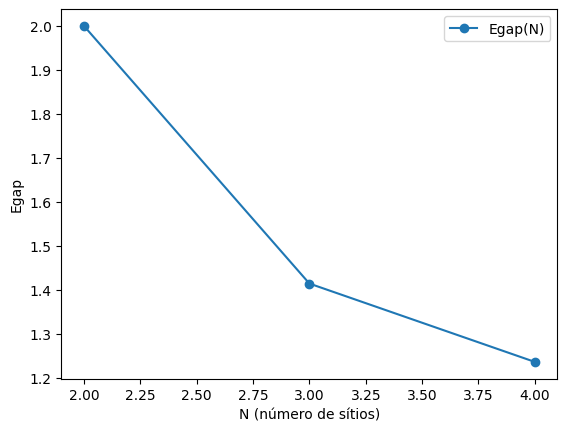

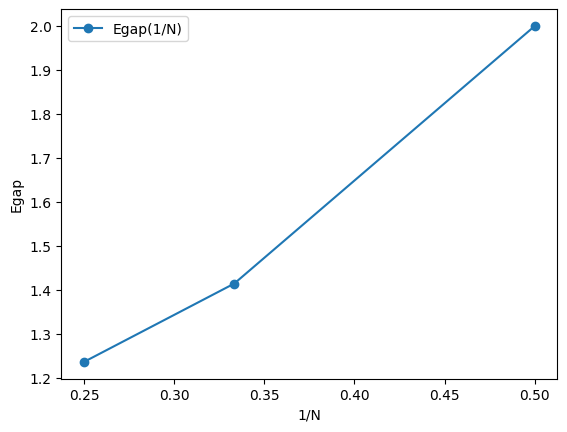

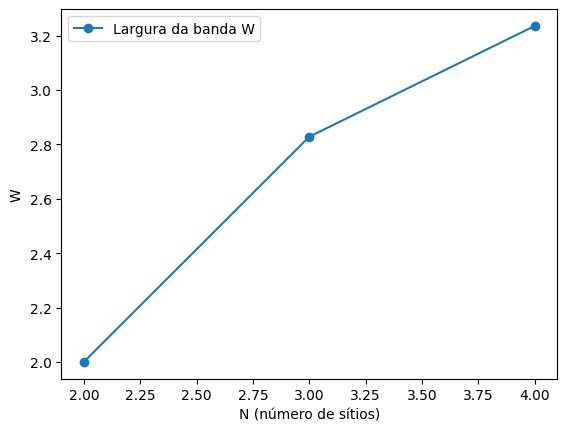

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# =====================================================
# Funções principais
# =====================================================

def huckel_solver(connectivity, alpha=0.0, beta=-1.0):
    """
    Recebe a matriz de conectividade (0/1 para ligações) 
    e retorna autovalores e autovetores do Hamiltoniano de Hückel.
    """
    n = connectivity.shape[0]
    H = alpha*np.eye(n) + beta*connectivity
    E, C = np.linalg.eigh(H)  # autovalores ordenados
    return E, C

def electron_configuration(E, C, nelec):
    """
    Preenche orbitais moleculares com 2 elétrons cada até completar nelec.
    Retorna HOMO, LUMO e gap.
    """
    idx_occ = nelec // 2  # número de orbitais ocupados
    EHOMO = E[idx_occ-1]
    ELUMO = E[idx_occ] if idx_occ < len(E) else None
    Egap = ELUMO - EHOMO if ELUMO else None
    return idx_occ, EHOMO, ELUMO, Egap

def population(C, idx_occ):
    """
    População eletrônica por sítio: q_i = 2*sum |c_i|^2 (orbitais ocupados)
    """
    q = 2*np.sum(np.abs(C[:, :idx_occ])**2, axis=1)
    return q

def bond_order(C, idx_occ, connectivity):
    """
    Ordem de ligação π entre i-j: p_ij = sum 2*c_i*c_j (orbitais ocupados)
    """
    n = connectivity.shape[0]
    pij = np.zeros((n, n))
    for mu in range(idx_occ):
        ci = C[:, mu]
        pij += 2*np.outer(ci, ci)
    return pij * connectivity  # só vizinhos

def participation_ratio(C):
    """
    Participation ratio de cada orbital.
    PR(mu) = (sum |c_i|^2)^2 / sum |c_i|^4
    """
    num = np.sum(np.abs(C)**2, axis=0)**2
    den = np.sum(np.abs(C)**4, axis=0)
    return num/den

# =====================================================
# Exemplo de uso com várias moléculas
# =====================================================

# Exemplo fictício: conectividades de moléculas lineares (substituir pelas suas!)
mol1 = np.array([[0,1],[1,0]])  # eteno
mol2 = np.array([[0,1,0],[1,0,1],[0,1,0]])  # 3 átomos
mol3 = np.array([[0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]])  # 4 átomos
molecules = [mol1, mol2, mol3]

results = []
for M in molecules:
    N = M.shape[0]
    nelec = N  # regra simples: 1 elétron π por sítio
    E, C = huckel_solver(M)
    idx_occ, EHOMO, ELUMO, Egap = electron_configuration(E, C, nelec)
    q = population(C, idx_occ)
    pij = bond_order(C, idx_occ, M)
    PR = participation_ratio(C)
    
    results.append({
        "N": N,
        "Egap": Egap,
        "W": np.max(E)-np.min(E),
        "EHOMO": EHOMO,
        "ELUMO": ELUMO,
        "PR_HOMO": PR[idx_occ-1],
        "PR_LUMO": PR[idx_occ],
        "q": q,
        "pij": pij
    })

# =====================================================
# Tabelas comparativas
# =====================================================
df = pd.DataFrame(results)
print(df[["N","Egap","W","PR_HOMO","PR_LUMO"]])

# =====================================================
# Gráficos de tendência
# =====================================================
plt.figure()
plt.plot(df["N"], df["Egap"], "o-", label="Egap(N)")
plt.xlabel("N (número de sítios)")
plt.ylabel("Egap")
plt.legend()
plt.show()

plt.figure()
plt.plot(1/df["N"], df["Egap"], "o-", label="Egap(1/N)")
plt.xlabel("1/N")
plt.ylabel("Egap")
plt.legend()
plt.show()

plt.figure()
plt.plot(df["N"], df["W"], "o-", label="Largura da banda W")
plt.xlabel("N (número de sítios)")
plt.ylabel("W")
plt.legend()
plt.show()


![alt text](q2e.png)

### Fluxo sugerido do código

1. **Entrada:**

   * Matrizes de conectividade $C$ (adjacência) de cada molécula.
   * A partir disso constrói a matriz de Hückel $H = \alpha I + \beta C$ (mas geralmente usa $\alpha = 0$, $\beta = -1$).

2. **Diagonalização:**

   * Calcular autovalores $E_\mu$ (orbitais moleculares).
   * Calcular autovetores $c_{i\mu}$.

3. **Cálculos:**

   * **População atômica $q_i$:**

     $$
     q_i = \sum_{\mu \in \text{ocupado}} 2 |c_{i\mu}|^2
     $$
   * **Ordem de ligação $p_{ij}$:**

     $$
     p_{ij} = \sum_{\mu \in \text{ocupado}} 2 c_{i\mu} c_{j\mu}
     $$
   * **Gap eletrônico:**

     $$
     E_\text{gap} = E_\text{LUMO} - E_\text{HOMO}
     $$
   * **Largura de banda:**

     $$
     W = \max(E_\mu) - \min(E_\mu)
     $$
   * **Participation Ratio (PR):**

     $$
     PR(\mu) = \frac{\left(\sum_i |c_{i\mu}|^2\right)^2}{\sum_i |c_{i\mu}|^4}
     $$

     para HOMO e LUMO.

4. **Saídas (para cada molécula):**

   * **Tabelas:**

     * Energias $E_\mu$ (com ocupação).
     * Populações $q_i$.
     * Ordens de ligação $p_{ij}$.
   * **Figuras:**

     1. Esquema da molécula com numeração.
     2. Espectro $E_\mu/\beta$ com HOMO/LUMO destacados.
     3. Mapas HOMO e LUMO (coeficientes dos orbitais).
     4. Gráficos comparativos:

        * $E_\text{gap}$ vs $N$
        * $E_\text{gap}$ vs $1/N$ (com ajuste linear)
        * $W$ vs $N$
        * PR(HOMO) e PR(LUMO) vs $N$

5. **Texto final (12–16 linhas):**

   * Discutir tendências: fechamento do gap, largura de banda, localização dos orbitais, variações de $q_i$ e $p_{ij}$.